In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd 
plt.style.use('seaborn')

%matplotlib inline

PATH = 'D:/0_DATALAB/0.DATA/geo/CDMX'

### Data 1. Ubicación Cicloestaciones

In [110]:
CEstaciones = pd.read_csv(PATH+"/geo_CEs.csv", 
                          delimiter='|', 
                          dtype={'CP': str})#, header=0)#, delim_whitespace=True)

CEstaciones.head()

,CE,Ubicación,CP,Latitud,Longitud
0,276,276 ANAXÁGORAS-OBRERO MUNDIAL,03020,19.401986,-99.156366
1,277,277 AMPLIACIÓN TONALÁ-OBRERO MUNDIAL,03020,19.401807,-99.159090
2,278,278 MIER Y PESADO-OBRERO MUNDIAL,03103,19.400710,-99.163831
3,279,279 LA MORENA-PROVIDENCIA,03103,19.399908,-99.166553
4,280,280 ANAXÁGORAS-OBRERO MUNDIAL,03020,19.401500,-99.156406


In [111]:
CEstaciones['LatLon'] = list(zip(CEstaciones['Latitud'], CEstaciones['Longitud']))
CEstaciones.head()

,CE,Ubicación,CP,Latitud,Longitud,LatLon
0,276,276 ANAXÁGORAS-OBRERO MUNDIAL,03020,19.401986,-99.156366,"(19.401985999999997, -99.156366)"
1,277,277 AMPLIACIÓN TONALÁ-OBRERO MUNDIAL,03020,19.401807,-99.159090,"(19.401807, -99.15909)"
2,278,278 MIER Y PESADO-OBRERO MUNDIAL,03103,19.400710,-99.163831,"(19.40071, -99.163831)"
3,279,279 LA MORENA-PROVIDENCIA,03103,19.399908,-99.166553,"(19.399908, -99.16655300000001)"
4,280,280 ANAXÁGORAS-OBRERO MUNDIAL,03020,19.401500,-99.156406,"(19.4015, -99.156406)"


In [112]:
print(CEstaciones.dtypes)
print(CEstaciones.columns)
print(CEstaciones.shape)

CE             int64
Ubicación     object
CP            object
Latitud      float64
Longitud     float64
LatLon        object
dtype: object
Index(['CE', 'Ubicación', 'CP', 'Latitud', 'Longitud', 'LatLon'], dtype='object')
(171, 6)


### Data 2. Polígono CDMX

In [113]:
cdmx = gpd.read_file(PATH+'/nyu_2451_36855.shp')#, dtype={'plz': str})
print(type(cdmx))
print(cdmx.dtypes)
print(cdmx.shape)
cdmx.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
CVEGEO        object
CVE_ENT       object
NOMGEO        object
geometry    geometry
dtype: object
(1, 4)


,CVEGEO,CVE_ENT,NOMGEO,geometry
0,09,09,Distrito Federal,"POLYGON ((-99.11485 19.55760, -99.11572 19.556..."


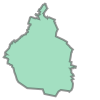

In [114]:
cdmx['geometry'][0]

### Data 3. Polígonos Delegaciones

In [115]:
#https://geodata.lib.berkeley.edu/?f%5Bdc_format_s%5D%5B%5D=Shapefile&f%5Bdct_spatial_sm%5D%5B%5D=Mexico&f%5Bdct_spatial_sm%5D%5B%5D=Distrito+Federal%2C+Mexico+City%2C+Mexico&f%5Blayer_geom_type_s%5D%5B%5D=Polygon
# https://geodata.lib.berkeley.edu/catalog/nyu_2451_36858
delegaciones = gpd.read_file(PATH+'/nyu_2451_36858.shp')#, dtype={'plz': str})
print(type(delegaciones))
print(delegaciones.dtypes)
print(delegaciones.shape)
delegaciones.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
CVEGEO        object
CVE_ENT       object
CVE_MUN       object
CVE_LOC       object
NOMGEO        object
AMBITO        object
geometry    geometry
dtype: object
(106, 7)


,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,NOMGEO,AMBITO,geometry
0,090020001,09,002,0001,Azcapotzalco,U,"POLYGON ((-99.18245 19.50756, -99.18229 19.507..."
1,090030001,09,003,0001,Coyoacán,U,"POLYGON ((-99.13427 19.35654, -99.13397 19.356..."
2,090040001,09,004,0001,Cuajimalpa de Morelos,U,"POLYGON ((-99.25698 19.40043, -99.25694 19.400..."
3,090040020,09,004,0020,San Lorenzo Acopilco,U,"POLYGON ((-99.32320 19.34177, -99.32316 19.341..."
4,090040050,09,004,0050,La Venta,R,"POLYGON ((-99.31213 19.33349, -99.31233 19.333..."


In [116]:
print(delegaciones.loc[delegaciones['NOMGEO']=='Cuauhtémoc','CVEGEO'])
print(delegaciones.loc[delegaciones['NOMGEO']=='Miguel Hidalgo','CVEGEO'])

103    090150001
Name: CVEGEO, dtype: object
104    090160001
Name: CVEGEO, dtype: object


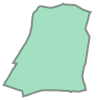

In [117]:
Cuauhtemoc = delegaciones['geometry'][103]
Cuauhtemoc

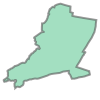

In [118]:
MiguelHidalgo = delegaciones['geometry'][104]
MiguelHidalgo

In [119]:
region = delegaciones.loc[103:104]
region

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,NOMGEO,AMBITO,geometry
103,090150001,09,015,0001,Cuauhtémoc,U,"POLYGON ((-99.13043 19.46320, -99.12951 19.462..."
104,090160001,09,016,0001,Miguel Hidalgo,U,"POLYGON ((-99.19044 19.47046, -99.19058 19.467..."


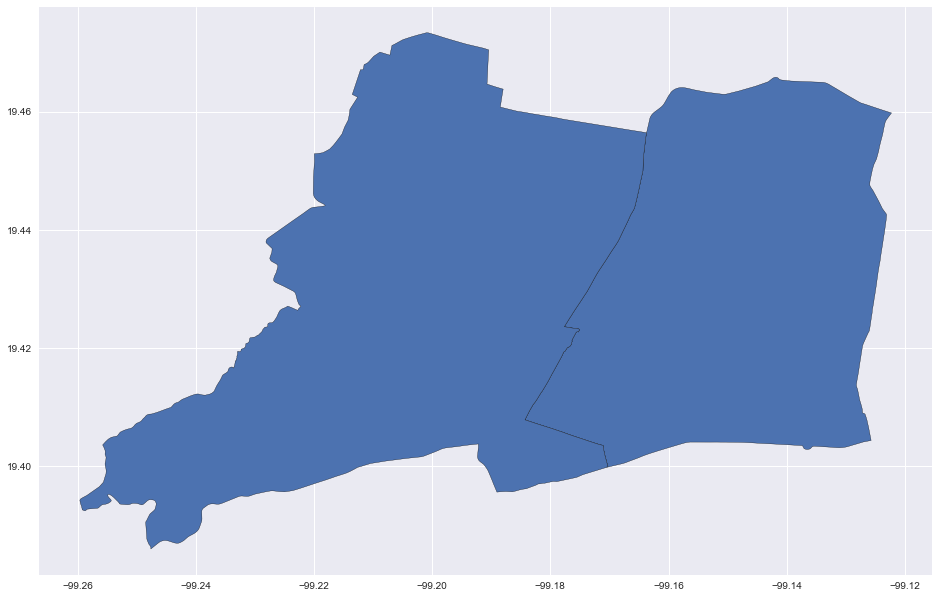

In [160]:
plt.rcParams['figure.figsize'] = [16, 11]
fig, ax = plt.subplots()
region.plot(ax=ax,edgecolor="black")

### Data 4. Polígonos Colonias:

In [120]:
#https://datos.gob.mx/busca/dataset/ubicacion-de-codigos-postales-en-mexico
colonias = gpd.read_file(PATH+'/códigos_postales/shapes_cps/CP_CdMx.shp')
print(type(colonias))
print(colonias.dtypes)
print(colonias.shape)
colonias.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
d_cp          object
geometry    geometry
dtype: object
(1404, 2)


,d_cp,geometry
0,01000,"POLYGON ((2794650.259 819469.097, 2794601.180 ..."
1,01010,"POLYGON ((2794230.289 821325.511, 2794251.904 ..."
2,01020,"POLYGON ((2795135.993 821201.964, 2795101.712 ..."
3,01030,"POLYGON ((2795755.869 821409.304, 2795928.518 ..."
4,01040,"POLYGON ((2794354.083 820033.165, 2794347.153 ..."


In [121]:
#GralAnaya = cdmx['geometry'][104]
print(colonias.loc[colonias['d_cp']=='03340','geometry'])

238    POLYGON ((2798106.686 821197.517, 2798145.408 ...
Name: geometry, dtype: geometry


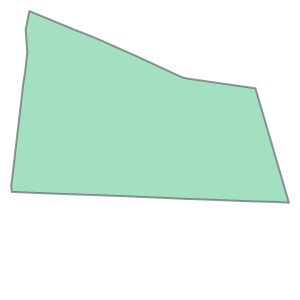

In [122]:
GralAnaya = colonias['geometry'][238]
GralAnaya

### Data 5. Códigos Postales db

In [123]:
#pd.read_csv('D:/0-PROJECTS/idato/PORTAFOLIO/ECOBICI/códigos_postales/cdmxCPs.csv',
#            delimiter=',',
#            encoding='latin1'
#           ).head()

In [125]:
# Codigos postales y Colonias:
CPs = pd.read_csv(PATH+'/códigos_postales/cdmxCPs.csv', 
                          delimiter='|',
                          encoding='latin1',
                          dtype={'d_codigo': str,
                                 'd_CP': str,
                                 'c_estado': str,
                                 'c_oficina': str,
                                 'c_CP': str,
                                 'c_tipo_asenta': str,
                                 'c_mnpio': str,
                                 'id_asenta_cpcons': str,
                                 'c_cve_ciudad': str
                                }
                         )#.set_index('# nId_Bici')
print(type(CPs))
print(CPs.dtypes)
print(CPs.shape)
CPs.head()

<class 'pandas.core.frame.DataFrame'>
d_codigo            object
d_asenta            object
d_tipo_asenta       object
D_mnpio             object
d_estado            object
d_ciudad            object
d_CP                object
c_estado            object
c_oficina           object
c_CP                object
c_tipo_asenta       object
c_mnpio             object
id_asenta_cpcons    object
d_zona              object
c_cve_ciudad        object
dtype: object
(145973, 15)


,d_codigo,d_asenta,d_tipo_asenta,D_mnpio,d_estado,d_ciudad,d_CP,c_estado,c_oficina,c_CP,c_tipo_asenta,c_mnpio,id_asenta_cpcons,d_zona,c_cve_ciudad
0,01000,San Ángel,Colonia,Álvaro Obregón,Distrito Federal,Ciudad de México,01001,09,01001,NaN,09,010,0001,Urbano,01
1,01010,Los Alpes,Colonia,Álvaro Obregón,Distrito Federal,Ciudad de México,01001,09,01001,NaN,09,010,0005,Urbano,01
2,01020,Guadalupe Inn,Colonia,Álvaro Obregón,Distrito Federal,Ciudad de México,01001,09,01001,NaN,09,010,0006,Urbano,01
3,01029,INFONAVIT,Gran usuario,Álvaro Obregón,Distrito Federal,Ciudad de México,01001,09,01001,NaN,22,010,0008,Urbano,01
4,01030,Florida,Colonia,Álvaro Obregón,Distrito Federal,Ciudad de México,01001,09,01001,NaN,09,010,0010,Urbano,01


### Graficación de Ciclo Estaciones

#### Metodo 1. Sencillo

In [126]:
# from pygeocoder import Geocoder #pip install pygeocoder FAIL
#GeoLoc = Geocoder.reverse_geocode(geoCEs['Latitud'][0], geoCEs['Longitud'][0])

from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame

**Geometrización de 'CEstaciones'**

In [127]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(CEstaciones['Longitud'], CEstaciones['Latitud'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
CEgdf = gpd.GeoDataFrame(CEstaciones, crs=crs, geometry=geometry)
CEgdf.head()

,CE,Ubicación,CP,Latitud,Longitud,LatLon,geometry
0,276,276 ANAXÁGORAS-OBRERO MUNDIAL,03020,19.401986,-99.156366,"(19.401985999999997, -99.156366)",POINT (-99.15637 19.40199)
1,277,277 AMPLIACIÓN TONALÁ-OBRERO MUNDIAL,03020,19.401807,-99.159090,"(19.401807, -99.15909)",POINT (-99.15909 19.40181)
2,278,278 MIER Y PESADO-OBRERO MUNDIAL,03103,19.400710,-99.163831,"(19.40071, -99.163831)",POINT (-99.16383 19.40071)
3,279,279 LA MORENA-PROVIDENCIA,03103,19.399908,-99.166553,"(19.399908, -99.16655300000001)",POINT (-99.16655 19.39991)
4,280,280 ANAXÁGORAS-OBRERO MUNDIAL,03020,19.401500,-99.156406,"(19.4015, -99.156406)",POINT (-99.15641 19.40150)


In [128]:
CEgdf['CE'].head()
#gdf2 = gdf.set_index('CE').head()
#gdf2

0    276
1    277
2    278
3    279
4    280
Name: CE, dtype: int64

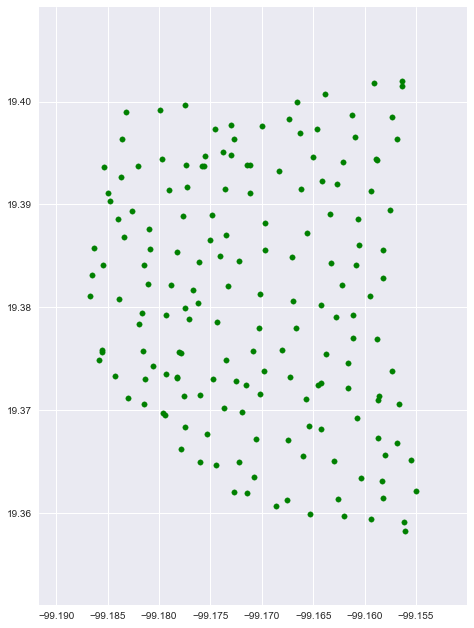

In [149]:
#plt.rcParams['figure.figsize'] = [16, 11]
#fig, ax = plt.subplots()
#region.plot(ax=ax)

# Plot all points
plt.rcParams['figure.figsize'] = [16, 11]
CEgdf.plot(marker='o', color='g', markersize=30)

In [156]:
# Definiendo el diccionario de Etiquetas:
CE_dict = CEgdf[['CE','LatLon']].set_index('CE')
CE_dict = CE_dict.to_dict()
CE_dict = CE_dict['LatLon']
CE_dict

{276: (19.401985999999997, -99.156366),
 277: (19.401807, -99.15909),
 278: (19.40071, -99.163831),
 279: (19.399908, -99.16655300000001),
 280: (19.4015, -99.156406),
 281: (19.398532, -99.157308),
 282: (19.398692, -99.161273),
 283: (19.39827, -99.167383),
 284: (19.397693, -99.17298100000001),
 285: (19.399688, -99.177524),
 286: (19.399201, -99.17994300000001),
 287: (19.398946, -99.183254),
 288: (19.396333, -99.183575),
 289: (19.397308, -99.174548),
 290: (19.396333, -99.172667),
 291: (19.397651, -99.169946),
 292: (19.396917000000002, -99.166264),
 293: (19.397373, -99.164598),
 294: (19.396513, -99.160924),
 295: (19.394282999999998, -99.15875600000001),
 296: (19.396328, -99.156871),
 297: (19.394412, -99.158907),
 298: (19.394073000000002, -99.16214000000001),
 299: (19.394601, -99.165054),
 300: (19.393268, -99.16833299999999),
 301: (19.393807000000002, -99.171133),
 302: (19.393832, -99.17146600000001),
 303: (19.394842, -99.173025),
 304: (19.395042999999998, -99.17382

In [157]:
print(type(CE_dict))
print(CE_dict.keys())

<class 'dict'>
dict_keys([276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446])


In [158]:
x, y=CE_dict[276][0], CE_dict[276][1]
x, y

(19.401985999999997, -99.156366)

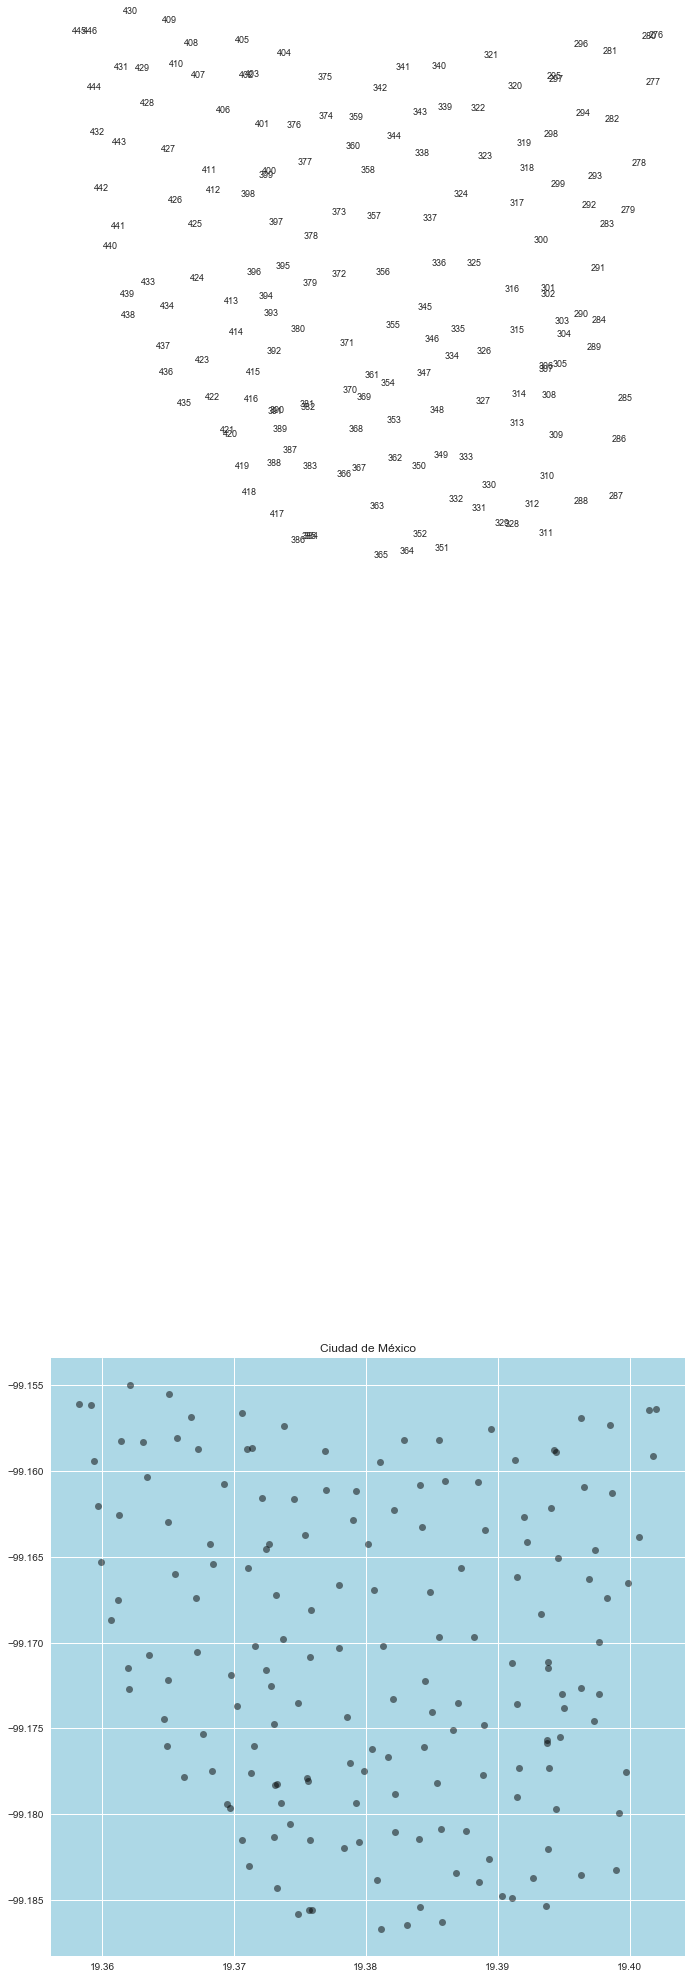

In [159]:
plt.rcParams['figure.figsize'] = [16, 11]
fig, ax = plt.subplots()
#region.plot(ax=ax)


# Graficamos las ciudades simultáneamente: 
for c in CE_dict.keys():

    # Despliegue Ajustado de Nombres de la Ciudades:
    ax.text(
        x=CE_dict[c][0], 
        y=CE_dict[c][1] + 0.08, # Ajuste de posición para que no se encime:
        s=c, 
        fontsize=9,
        ha='center', 
    )
    # Graficación de centroides de posición:
    ax.plot(
        CE_dict[c][0], 
        CE_dict[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    # Formatos Adicionales
    ax.set(
    title='Ciudad de México', 
    aspect=1.3, 
    facecolor='lightblue'
);

In [151]:
#CE_dict.plot()